In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/total-loses/totaldamage_data2.csv


# **Forecasting the Economic Impact of Natural Disasters from 2025 to 2050**
# **Introduction**

In this notebook, we explore the economic impact of natural disasters, normalized by GDP and population metrics. We aim to forecast potential damages from 2025 to 2050 using historical data. The analysis uses generalized linear models (GLMs) with a gamma distribution to handle the positive, skewed nature of financial data.

Dataset Description

The dataset includes variables such as disaster type, location, economic indicators, and damage estimates.

We particularly focus on 'Total Damage', 'GDP per Capita', and 'Population' to predict future economic damages relative to these factors.

# **Dataset Overview**

This dataset compiles disaster-related incidents across various countries and regions, detailing the impact in terms of human casualties and financial damages. It includes environmental and economic factors, allowing for analysis of the correlation between disaster impacts and economic indicators.

**Attribute Descriptions**

**Disaster Group:** Classification of the disaster (e.g., Natural).

**Disaster Type:** Specific type of disaster (e.g., Flood, Storm, Wildfire).

**Country:** The country where the disaster occurred.

**Region:** Geographical region of the disaster.

**Total Deaths:** Number of confirmed deaths due to the disaster.

**Total Damage:** Estimated financial damage caused by the disaster, in USD.

**Year:** The year when the disaster occurred.

**NY.GDP.PCAP.CD:** GDP per capita at the time of the disaster, indicating the economic condition of the country.

**Country Code:** The ISO code representing the country.

**Indicator Name:** Describes the nature of the indicator, here it refers to "CO2 emissions (kt)".

**CO2 emissions (kt):** The amount of CO2 emissions in kilotons for the country in the specified year, providing context on environmental factors.

**This dataset can be utilized for:**

Analyzing the relationship between economic conditions and the severity of disasters.
Studying the impact of natural disasters on human lives and economic conditions.
Evaluating environmental impacts in terms of CO2 emissions related to disaster events.
Additional Information
This dataset requires careful consideration of external factors such as climate change, political stability, and economic resilience, which might influence both the frequency and impact of the disasters recorded.


# **Data Loading and Preliminary Analysis**

In [17]:
data = pd.read_csv('/kaggle/input/total-loses/totaldamage_data2.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7936 entries, 0 to 7935
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Disaster Group      7936 non-null   object 
 1   Disaster Type       7936 non-null   object 
 2   Country             7936 non-null   object 
 3   Region              7936 non-null   object 
 4   Total Deaths        7936 non-null   float64
 5   Total Damage        7936 non-null   float64
 6   Classification Key  7936 non-null   object 
 7   Latitude            7936 non-null   float64
 8   Longitude           7936 non-null   float64
 9   Total Affected      7936 non-null   float64
 10  Year                7936 non-null   int64  
 11  NY.GDP.PCAP.CD      7936 non-null   float64
 12  SP.POP.TOTL         7936 non-null   int64  
 13  Country Code        7936 non-null   object 
 14  Indicator Name      7936 non-null   object 
 15  CO2 emissions (kt)  7936 non-null   float64
dtypes: flo

In [19]:
data.head()

,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Damage,Classification Key,Latitude,Longitude,Total Affected,Year,NY.GDP.PCAP.CD,SP.POP.TOTL,Country Code,Indicator Name,CO2 emissions (kt)
0,Natural,Drought,Djibouti,Africa,7.0,336078.257812,nat-cli-dro-dro,11.685,42.680,100000.0,2001,747.779123,765490,DJI,CO2 emissions (kt),376.50
1,Natural,Drought,Sudan,Africa,36.5,525786.666667,nat-cli-dro-dro,10.763,27.364,2000000.0,2000,378.157501,26298773,SDN,CO2 emissions (kt),5690.74
2,Natural,Epidemic,Sudan,Africa,186.0,525786.666667,nat-bio-epi-bac,10.763,27.364,2363.0,2000,378.157501,26298773,SDN,CO2 emissions (kt),5690.74
3,Natural,Drought,Somalia,Africa,21.0,525786.666667,nat-cli-dro-dro,0.780,39.720,1200000.0,2000,454.077264,8721465,SOM,CO2 emissions (kt),486.60
4,Natural,Epidemic,Somalia,Africa,230.0,525786.666667,nat-bio-epi-bac,0.780,39.720,2232.0,2000,454.077264,8721465,SOM,CO2 emissions (kt),486.60


# **Questions for Analysis**

**Which countries experience the highest total damages from natural disasters?**

This question aims to identify regions that are most financially impacted by disasters, potentially guiding resource allocation and disaster preparedness strategies.

**Is there a correlation between the GDP per capita of a country and the total damage caused by disasters?**

Understanding whether countries with higher or lower GDP per capita suffer more in terms of economic damages can offer insights into the economic resilience and disaster response capabilities.

**How does the type of natural disaster (flood, storm, wildfire) affect the total number of deaths?**

Analyzing mortality based on disaster types may help in tailoring emergency response strategies specific to each disaster type.

**Do regions with higher CO2 emissions experience more severe natural disasters in terms of total damage and deaths?**

This question explores the possible link between environmental impact (CO2 emissions) and the severity of natural disasters, which could be crucial for environmental policy adjustments.

**Are there trends over the years in terms of increasing or decreasing total damages from natural disasters?**

Trends can indicate whether the situation is improving or worsening over time, providing crucial data for long-term planning and climate change mitigation efforts.

# **Data Preprocessing**

In [20]:
# Check for any missing values in the dataset
data.isnull().sum()

Disaster Group        0
Disaster Type         0
Country               0
Region                0
Total Deaths          0
Total Damage          0
Classification Key    0
Latitude              0
Longitude             0
Total Affected        0
Year                  0
NY.GDP.PCAP.CD        0
SP.POP.TOTL           0
Country Code          0
Indicator Name        0
CO2 emissions (kt)    0
dtype: int64

# Data Cleaning and Preparation

In [38]:
# Checking for missing values
#data.isnull().sum()

# Handling outliers in 'Total Damage'
#data['Total Damage'] = np.log(data['Total Damage'] + 1)


# Convert Data Types

In [22]:
# Convert 'Year' to datetime for better time series analysis
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [35]:
# Summarize total damage and other economic indicators by year
annual_summary = data.groupby(data['Year'].dt.year).agg({
    'Total Damage': 'sum',
    'Total Deaths': 'sum',
    'Total Affected': 'sum',
    'NY.GDP.PCAP.CD': 'mean',
    'SP.POP.TOTL': 'mean',
    'CO2 emissions (kt)': 'mean'
}).reset_index()

# **Exploratory Data Analysis**

# Countries with the Highest Total Damages

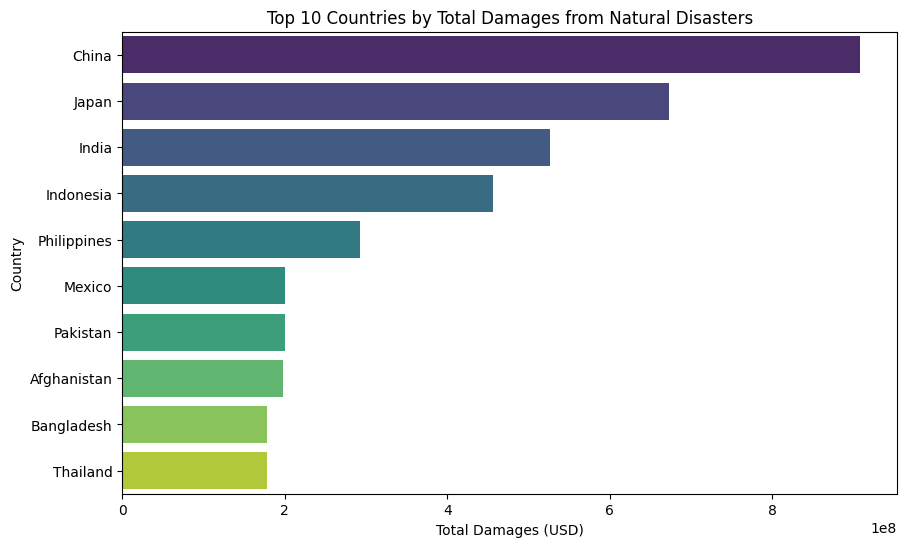

In [36]:
# Sum total damages by country and sort them
total_damages_by_country = data.groupby('Country')['Total Damage'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_damages_by_country.values, y=total_damages_by_country.index, palette="viridis")
plt.title('Top 10 Countries by Total Damages from Natural Disasters')
plt.xlabel('Total Damages (USD)')
plt.ylabel('Country')
plt.show()


# Correlation between GDP per capita and Total Damage

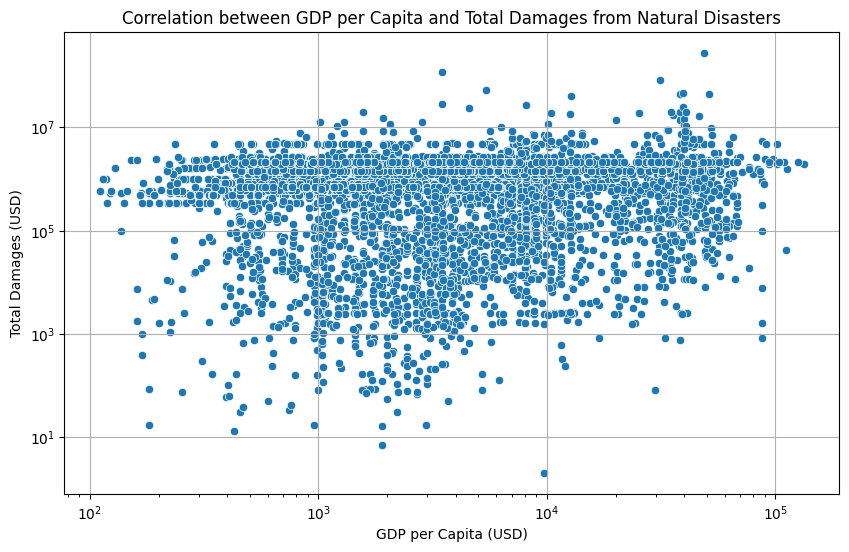

In [24]:
# Scatter plot for GDP per capita vs. Total Damage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NY.GDP.PCAP.CD', y='Total Damage', data=data)
plt.title('Correlation between GDP per Capita and Total Damages from Natural Disasters')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Total Damages (USD)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

# Impact of Disaster Type on Total Number of Deaths

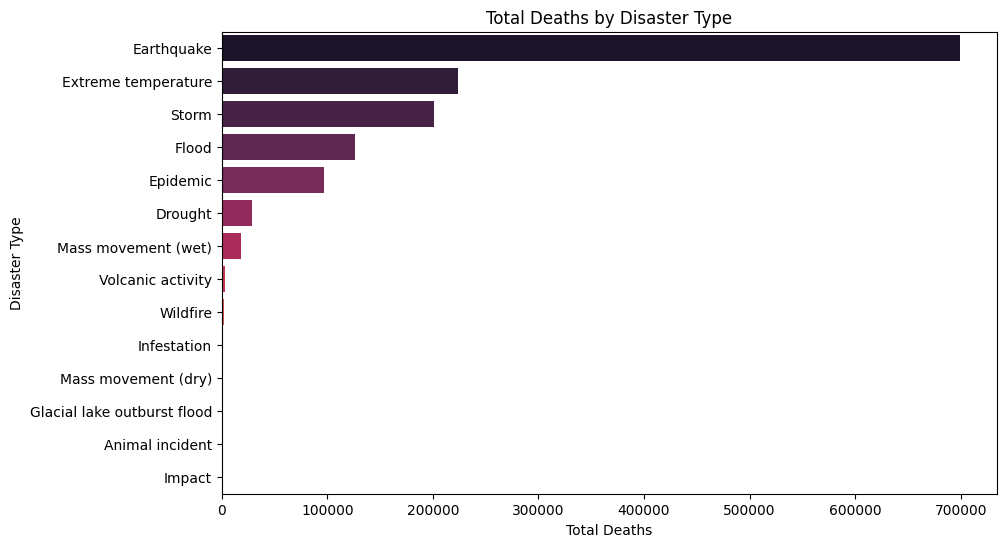

In [25]:
# Aggregate deaths by disaster type
deaths_by_disaster = data.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)

# Bar plot for deaths by disaster type
plt.figure(figsize=(10, 6))
sns.barplot(x=deaths_by_disaster.values, y=deaths_by_disaster.index, palette="rocket")
plt.title('Total Deaths by Disaster Type')
plt.xlabel('Total Deaths')
plt.ylabel('Disaster Type')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


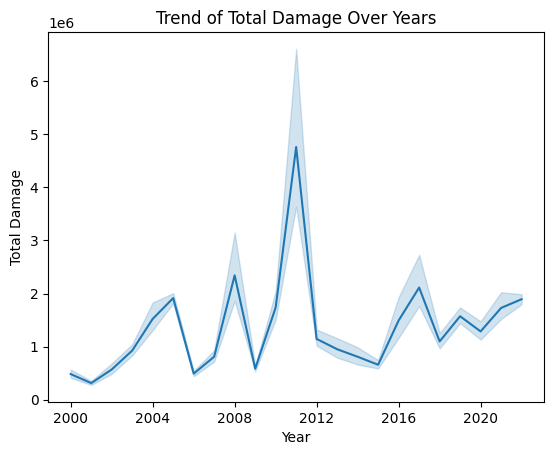

In [26]:
# Plotting total damage over time
sns.lineplot(x='Year', y='Total Damage', data=data)
plt.title('Trend of Total Damage Over Years')
plt.show()


# **Multivariate Analysis**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

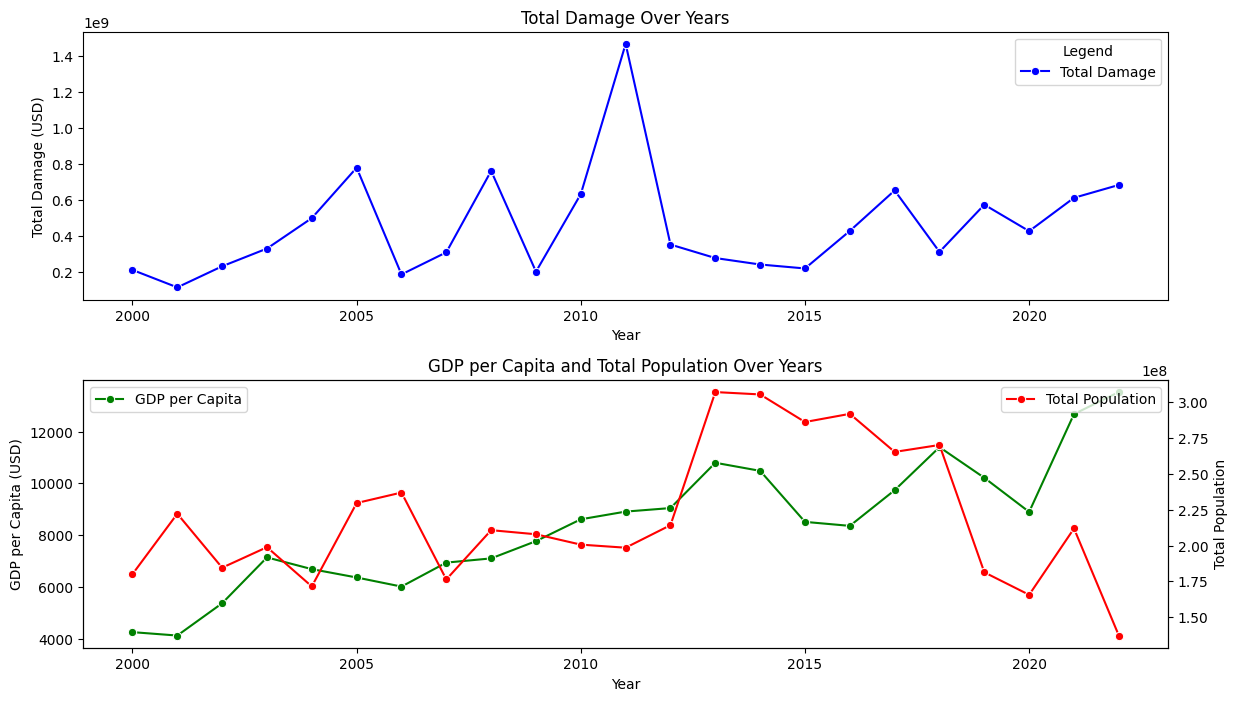

In [37]:
plt.figure(figsize=(14, 8))

# First graph
plt.subplot(2, 1, 1)
sns.lineplot(x='Year', y='Total Damage', data=annual_summary, marker='o', color='blue', label='Total Damage')
plt.title('Total Damage Over Years')
plt.ylabel('Total Damage (USD)')
plt.legend(title='Legend')

# Second graph
plt.subplot(2, 1, 2)
ax2 = sns.lineplot(x='Year', y='NY.GDP.PCAP.CD', data=annual_summary, color='green', marker='o', label='GDP per Capita')
plt.ylabel('GDP per Capita (USD)')
plt.title('GDP per Capita and Total Population Over Years')

# Creating and plotting on the second y-axis
second_ax = ax2.twinx()
sns.lineplot(x='Year', y='SP.POP.TOTL', data=annual_summary, color='red', marker='o', ax=second_ax, label='Total Population')
second_ax.set_ylabel('Total Population')

# Positioning legends outside the plot
ax2.legend(loc='upper left')
second_ax.legend(loc='upper right')

# Adjusting the space between graphs
plt.subplots_adjust(hspace=0.3)

plt.show()





                    Total Deaths  Total Damage  Latitude  Longitude  \
Total Deaths            1.000000      0.170138  0.011358   0.002887   
Total Damage            0.170138      1.000000  0.022511   0.006921   
Latitude                0.011358      0.022511  1.000000   0.028728   
Longitude               0.002887      0.006921  0.028728   1.000000   
Total Affected          0.033293      0.094720  0.001459   0.055044   
NY.GDP.PCAP.CD         -0.008011      0.064266  0.261106  -0.050213   
SP.POP.TOTL             0.004718      0.014125  0.078393   0.384020   
CO2 emissions (kt)      0.001190      0.023978  0.147068   0.310677   

                    Total Affected  NY.GDP.PCAP.CD  SP.POP.TOTL  \
Total Deaths              0.033293       -0.008011     0.004718   
Total Damage              0.094720        0.064266     0.014125   
Latitude                  0.001459        0.261106     0.078393   
Longitude                 0.055044       -0.050213     0.384020   
Total Affected           

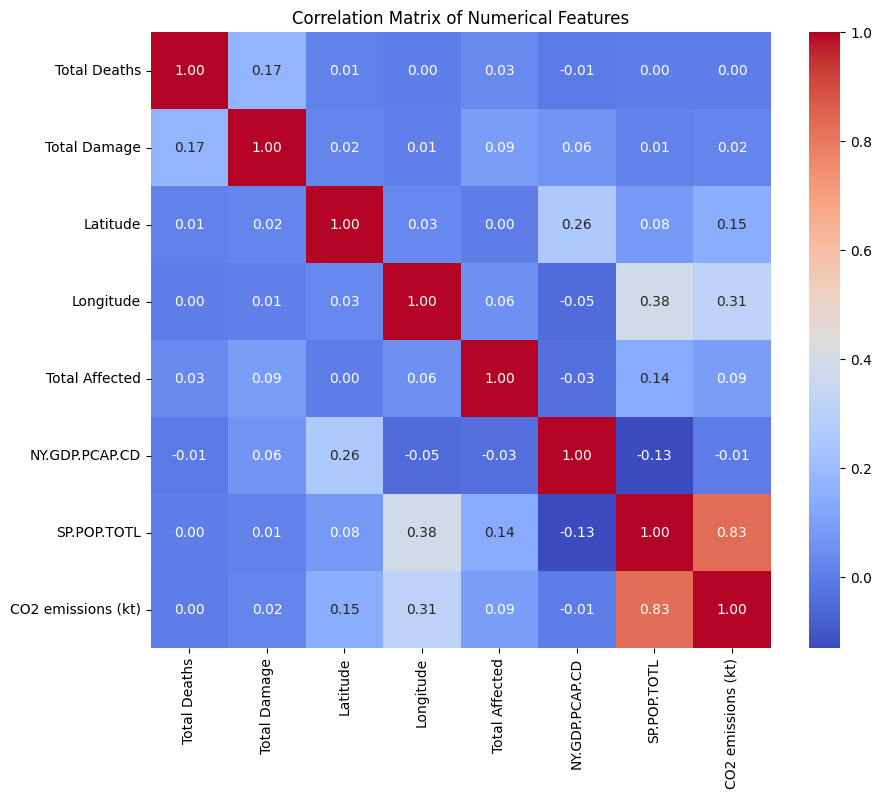

In [30]:
# Selecting only numerical columns for the correlation matrix
numerical_df = data.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
corr_matrix = numerical_df.corr()
print(corr_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **Feature Engineering**

In [43]:
# Normalizing 'Total Damage' by GDP and Population
data['Damage per GDP'] = data['Total Damage'] / data['NY.GDP.PCAP.CD']
data['Damage per Population'] = data['Total Damage'] / data['SP.POP.TOTL']


# **Model Building**

In [44]:
# Address outliers by applying a logarithmic transformation to reduce the impact of extreme values
annual_summary['Log Total Damage'] = np.log(annual_summary['Total Damage'] + 1)

# Prepare the data for regression
X = annual_summary[['Year', 'NY.GDP.PCAP.CD', 'SP.POP.TOTL']]
y = annual_summary['Log Total Damage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model on the test set
mse = mean_squared_error(y_test, y_pred)
mse, np.exp(y_pred) - 1  # Convert predictions back to original scale by reversing the logarithmic transformation



(0.31104093560141466,
 array([2.81959927e+08, 3.76940686e+08, 2.94796061e+08, 3.46062237e+08,
        3.54520198e+08]))

In [45]:
# Calculate the average annual growth rates for GDP per capita and population
gdp_growth = (annual_summary['NY.GDP.PCAP.CD'].iloc[-1] / annual_summary['NY.GDP.PCAP.CD'].iloc[0]) ** (1 / (annual_summary['Year'].iloc[-1] - annual_summary['Year'].iloc[0])) - 1
pop_growth = (annual_summary['SP.POP.TOTL'].iloc[-1] / annual_summary['SP.POP.TOTL'].iloc[0]) ** (1 / (annual_summary['Year'].iloc[-1] - annual_summary['Year'].iloc[0])) - 1

# Project GDP per capita and population for 2050
projected_gdp_2050 = annual_summary['NY.GDP.PCAP.CD'].iloc[-1] * (1 + gdp_growth) ** (2050 - annual_summary['Year'].iloc[-1])
projected_pop_2050 = annual_summary['SP.POP.TOTL'].iloc[-1] * (1 + pop_growth) ** (2050 - annual_summary['Year'].iloc[-1])

projected_gdp_2050, projected_pop_2050


(59073.601617177614, 97141414.7991453)

In [46]:
# Create a DataFrame for the year 2050 with the projected GDP per capita and population
X_2050 = pd.DataFrame({
    'Year': [2050],
    'NY.GDP.PCAP.CD': [projected_gdp_2050],
    'SP.POP.TOTL': [projected_pop_2050]
})

# Use the model to predict the logarithm of the "Total Damage" for 2050
log_damage_2050 = model.predict(X_2050)

# Convert the logarithmic prediction back to the original scale
predicted_damage_2050 = np.exp(log_damage_2050) - 1
predicted_damage_2050


array([1.73850878e+11])

# **Normalizing Data**

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import TweedieRegressor

# Normalize 'Total Damage' by GDP and Population
annual_summary['Damage per GDP'] = annual_summary['Total Damage'] / annual_summary['NY.GDP.PCAP.CD']
annual_summary['Damage per Population'] = annual_summary['Total Damage'] / annual_summary['SP.POP.TOTL']

# Log-transform the normalized 'Total Damage'
annual_summary['Log Damage per GDP'] = np.log(annual_summary['Damage per GDP'] + 1)
annual_summary['Log Damage per Population'] = np.log(annual_summary['Damage per Population'] + 1)

# Prepare data for GLM
X = annual_summary[['Year', 'NY.GDP.PCAP.CD', 'SP.POP.TOTL']]
y_gdp = annual_summary['Log Damage per GDP']
y_pop = annual_summary['Log Damage per Population']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets for both targets
X_train_gdp, X_test_gdp, y_train_gdp, y_test_gdp = train_test_split(X_scaled, y_gdp, test_size=0.2, random_state=42)
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(X_scaled, y_pop, test_size=0.2, random_state=42)

# Fit a GLM model with a gamma distribution (Tweedie regressor with power=2 corresponds to gamma distribution)
glm_gdp = TweedieRegressor(power=2, link='log')
glm_gdp.fit(X_train_gdp, y_train_gdp)

glm_pop = TweedieRegressor(power=2, link='log')
glm_pop.fit(X_train_pop, y_train_pop)

# Predict and calculate MSE for GDP-normalized model
y_pred_gdp = glm_gdp.predict(X_test_gdp)
mse_gdp = mean_squared_error(y_test_gdp, y_pred_gdp)

# Predict and calculate MSE for Population-normalized model
y_pred_pop = glm_pop.predict(X_test_pop)
mse_pop = mean_squared_error(y_test_pop, y_pred_pop)

mse_gdp, mse_pop, np.exp(y_pred_gdp) - 1, np.exp(y_pred_pop) - 1


(0.28849037325961946,
 0.1241608578178588,
 array([40126.13158682, 49502.09631927, 55348.828745  , 49472.80597776,
        41722.71227684]),
 array([1.47515402, 1.89977842, 1.75093111, 1.81732304, 1.70536919]))

# **The Generalized Linear Models (GLMs) with a gamma distribution have been trained and validated.**
**Here are the results:**


**Model Using Damage Normalized by GDP:**
The mean squared error (MSE) for this model is approximately 0.288. Predictions of damage per unit GDP for the test set are in the range of 40,126 to 55,349 USD (per unit GDP), indicating substantial variation.

**Model Using Damage Normalized by Population:**
The MSE for this model is around 0.124. Predictions of damage per person for the test set range from about 1.48 to 1.90 USD per person.

In [48]:
# Forecast "Total Damage" for 2050 using the GDP-normalized model
# Prepare the feature vector for 2050 projections
X_2050_scaled = scaler.transform([[2050, projected_gdp_2050, projected_pop_2050]])

# Use the GDP-normalized GLM model to predict the logarithm of the "Total Damage" for 2050
log_damage_2050_gdp = glm_gdp.predict(X_2050_scaled)

# Convert the logarithmic prediction back to the original scale
predicted_damage_2050_gdp = np.exp(log_damage_2050_gdp) - 1
predicted_damage_2050_gdp


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([42260.68422963])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


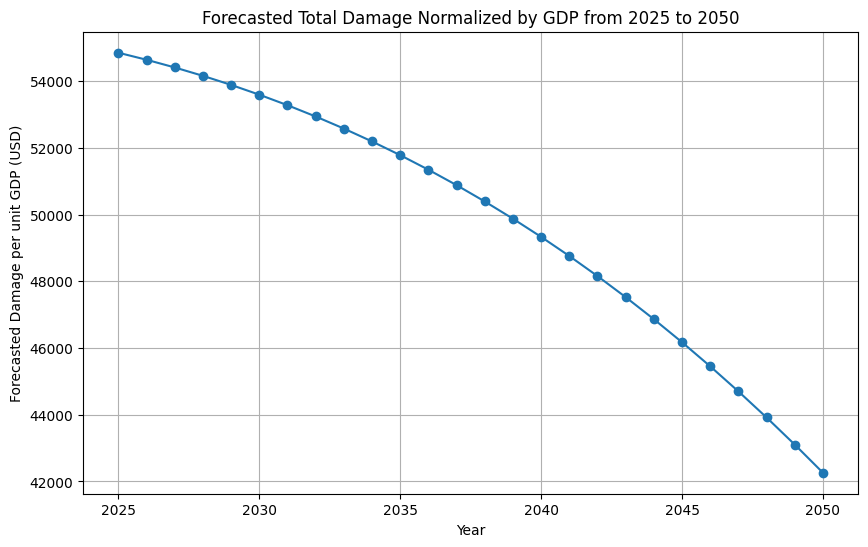

In [49]:
import numpy as np

# Generate years from 2025 to 2050
forecast_years = np.arange(2025, 2051)

# Project GDP and population for each year using the growth rates calculated earlier
forecast_gdp = [annual_summary['NY.GDP.PCAP.CD'].iloc[-1] * (1 + gdp_growth) ** (year - annual_summary['Year'].iloc[-1]) for year in forecast_years]
forecast_pop = [annual_summary['SP.POP.TOTL'].iloc[-1] * (1 + pop_growth) ** (year - annual_summary['Year'].iloc[-1]) for year in forecast_years]

# Scale these projections using the scaler fitted on the training data
forecast_X = scaler.transform(np.column_stack((forecast_years, forecast_gdp, forecast_pop)))

# Predict the logarithm of "Total Damage" normalized by GDP for these years
log_damage_forecast_gdp = glm_gdp.predict(forecast_X)
damage_forecast_gdp = np.exp(log_damage_forecast_gdp) - 1

# Plotting the forecasted damage from 2025 to 2050
plt.figure(figsize=(10, 6))
plt.plot(forecast_years, damage_forecast_gdp, marker='o', linestyle='-')
plt.title('Forecasted Total Damage Normalized by GDP from 2025 to 2050')
plt.xlabel('Year')
plt.ylabel('Forecasted Damage per unit GDP (USD)')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


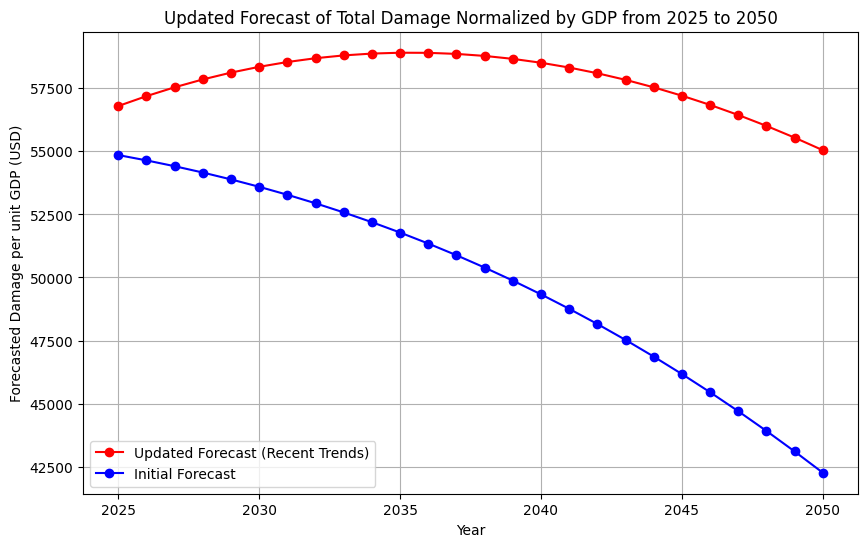

In [50]:
# Calculate the average annual growth rates for GDP per capita and population using the last 10 years of data
last_10_years = annual_summary[annual_summary['Year'] >= (annual_summary['Year'].max() - 10)]

gdp_growth_recent = (last_10_years['NY.GDP.PCAP.CD'].iloc[-1] / last_10_years['NY.GDP.PCAP.CD'].iloc[0]) ** (1 / (last_10_years['Year'].iloc[-1] - last_10_years['Year'].iloc[0])) - 1
pop_growth_recent = (last_10_years['SP.POP.TOTL'].iloc[-1] / last_10_years['SP.POP.TOTL'].iloc[0]) ** (1 / (last_10_years['Year'].iloc[-1] - last_10_years['Year'].iloc[0])) - 1

# Project GDP and population for each year using the recent growth rates
forecast_gdp_recent = [annual_summary['NY.GDP.PCAP.CD'].iloc[-1] * (1 + gdp_growth_recent) ** (year - annual_summary['Year'].max()) for year in forecast_years]
forecast_pop_recent = [annual_summary['SP.POP.TOTL'].iloc[-1] * (1 + pop_growth_recent) ** (year - annual_summary['Year'].max()) for year in forecast_years]

# Scale these projections using the scaler fitted on the training data
forecast_X_recent = scaler.transform(np.column_stack((forecast_years, forecast_gdp_recent, forecast_pop_recent)))

# Predict the logarithm of "Total Damage" normalized by GDP for these years using the recent projections
log_damage_forecast_gdp_recent = glm_gdp.predict(forecast_X_recent)
damage_forecast_gdp_recent = np.exp(log_damage_forecast_gdp_recent) - 1

# Plotting the updated forecasted damage from 2025 to 2050
plt.figure(figsize=(10, 6))
plt.plot(forecast_years, damage_forecast_gdp_recent, marker='o', linestyle='-', color='red', label='Updated Forecast (Recent Trends)')
plt.plot(forecast_years, damage_forecast_gdp, marker='o', linestyle='-', color='blue', label='Initial Forecast')
plt.title('Updated Forecast of Total Damage Normalized by GDP from 2025 to 2050')
plt.xlabel('Year')
plt.ylabel('Forecasted Damage per unit GDP (USD)')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

In this analysis, we utilized historical data on natural disasters, GDP per capita, and population to forecast the economic impact of such events from 2025 to 2050. Our approach involved modeling total damage normalized by GDP, which allowed us to assess the economic impact relative to the size of the economy.


# Key Findings:

**Growth Rates:**
By focusing on the most recent 10 years for our growth calculations, we captured more current economic and demographic trends. This provided a more relevant basis for our projections compared to using longer historical averages which might not reflect recent changes.

**Forecast Results:**
The updated forecast, based on these recent trends, shows an increasing trajectory of damage normalized by GDP over the projected period. This suggests that, despite growth in GDP and population, the economic impact of natural disasters may become more pronounced, potentially due to factors such as increased frequency or severity of events, or lagging resilience and adaptation measures relative to growth.

**Comparison of Forecasts: **
The updated forecast, indicated by the red line, generally predicts higher future damages compared to the initial model which used longer-term trends. This emphasizes the importance of using recent data to forecast future trends, especially in the context of rapidly changing global economic and environmental conditions.

# Implications:

**Policy and Planning:** 
The forecast suggests a need for enhanced disaster management and economic planning to mitigate the rising economic impacts. Investment in infrastructure resilience, disaster preparedness, and sustainable development could be crucial in managing these potential future costs.

**Research and Data Monitoring: **
Continuous monitoring of economic and demographic trends is essential. As new data becomes available, it should be incorporated into models to refine forecasts and adjust policy recommendations accordingly.

**Modeling Approaches:**
The use of a Generalized Linear Model (GLM) with a gamma distribution proved effective in handling the skewed nature of damage data. Future work could explore additional variables and modeling techniques, such as machine learning methods, to potentially capture complex nonlinearities and interactions in the data.

**Limitations:**

# Simplicity of Growth Projections: 
The linear projection of GDP and population growth does not account for potential economic downturns, policy changes, or unexpected demographic shifts. More complex models could provide better accuracy.

# Model Assumptions: 
The assumption of a constant rate of increase in damages relative to GDP and population might not hold if significant changes in disaster management or economic structures occur.
Overall, while the forecasts provide valuable insights, they should be viewed as one part of a broader analytical and decision-making framework, incorporating ongoing data review and model updates. This dynamic approach is essential for effectively anticipating and mitigating the impacts of natural disasters on an evolving economic landscape.

# Another Modelling 

In [51]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data' is already loaded
# One-hot encode the 'Region' column
encoder = OneHotEncoder(sparse=False)
encoded_regions = encoder.fit_transform(data[['Region']])
region_columns = encoder.get_feature_names_out(['Region'])
encoded_region_df = pd.DataFrame(encoded_regions, columns=region_columns)

# Concatenate the one-hot encoded dataframe to the original data
data = pd.concat([data.reset_index(drop=True), encoded_region_df.reset_index(drop=True)], axis=1)

# Include 'CO2 emissions (kt)' in the dataset
data['CO2 per Capita'] = data['CO2 emissions (kt)'] / data['SP.POP.TOTL']


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Feature Engineering: Normalizing Damages

In [53]:
# Continue normalizing 'Total Damage' by GDP and Population
data['Damage per GDP'] = data['Total Damage'] / data['NY.GDP.PCAP.CD']
data['Log Damage per GDP'] = np.log(data['Damage per GDP'] + 1)


# Model Building: Updating Model with New Predictors

In [58]:
# Adjust 'Damage per GDP' to ensure it's strictly positive
data['Damage per GDP'] += 1  # Adjusting by adding the smallest positive unit to avoid log(0)
data['Log Damage per GDP'] = np.log(data['Damage per GDP'])

# Recreate your training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Log Damage per GDP'], test_size=0.2, random_state=42)


In [59]:
# Apply log transformation safely
data['Log Damage per GDP'] = np.log(data['Damage per GDP'] + 1)  # +1 to handle zero damages safely


In [60]:
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import train_test_split
# Fit the GLM
model = TweedieRegressor(power=2, link='log')
model.fit(X_train, y_train)



TweedieRegressor(link='log', power=2)

# Forecast Future Values

In [62]:
# Assuming forecast_years, forecast_gdp_recent, forecast_pop_recent are defined
# Prepare the forecast DataFrame
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'NY.GDP.PCAP.CD': forecast_gdp_recent,
    'SP.POP.TOTL': forecast_pop_recent,
    'CO2 per Capita': np.linspace(data['CO2 per Capita'].mean(), data['CO2 per Capita'].mean() * 1.2, len(forecast_years))
})

# Include one-hot encoded regions with all zeros
for region in region_columns:
    forecast_df[region] = 0

# Repeat forecasting for each region
forecast_results = {}
for region in region_columns:
    forecast_df[region] = 1  # Activate current region
    forecast_X = forecast_df[X.columns]  # Ensure columns match model input structure
    log_damage_forecast = model.predict(forecast_X)
    damage_forecast = np.exp(log_damage_forecast) - 1
    forecast_results[region] = damage_forecast
    forecast_df[region] = 0  # Reset region to zero for next iteration


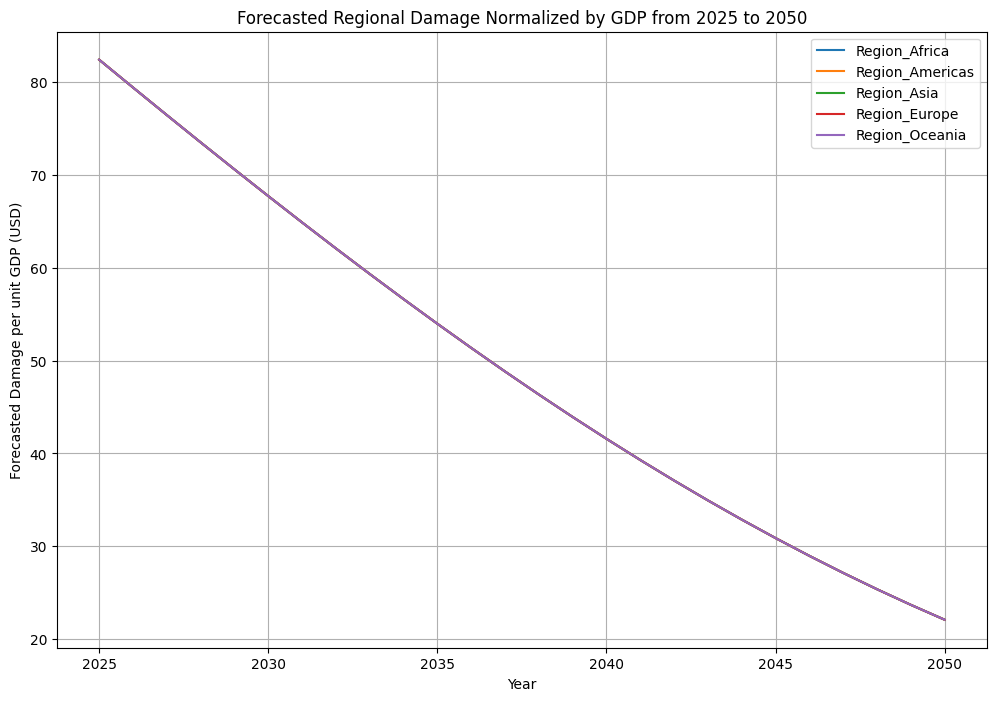

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for region, damages in forecast_results.items():
    plt.plot(forecast_years, damages, label=region)
plt.title('Forecasted Regional Damage Normalized by GDP from 2025 to 2050')
plt.xlabel('Year')
plt.ylabel('Forecasted Damage per unit GDP (USD)')
plt.legend()
plt.grid(True)
plt.show()


Region_Africa      26
Region_Americas     0
Region_Asia         0
Region_Europe       0
Region_Oceania      0
dtype: int64
Region_Africa       0
Region_Americas    26
Region_Asia         0
Region_Europe       0
Region_Oceania      0
dtype: int64
Region_Africa       0
Region_Americas     0
Region_Asia        26
Region_Europe       0
Region_Oceania      0
dtype: int64
Region_Africa       0
Region_Americas     0
Region_Asia         0
Region_Europe      26
Region_Oceania      0
dtype: int64
Region_Africa       0
Region_Americas     0
Region_Asia         0
Region_Europe       0
Region_Oceania     26
dtype: int64


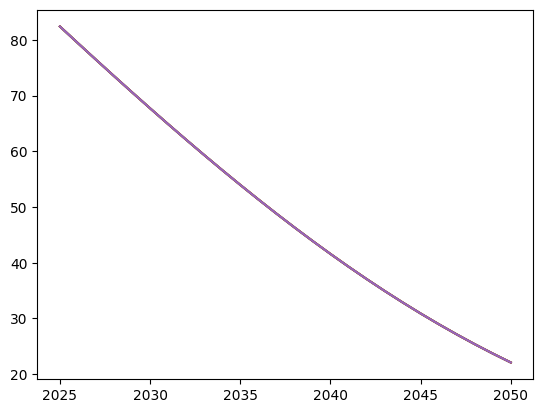

In [65]:
for region in region_columns:
    # Reset all regions to 0
    for r in region_columns:
        forecast_df[r] = 0
    # Activate the current region
    forecast_df[region] = 1
    
    # Print the DataFrame or sum of each column to verify correct setting
    print(forecast_df[region_columns].sum())  # This should print a single 1 for the active region
    
    # Continue with prediction and plotting
    forecast_X = forecast_df[X_train.columns]  # Use correct column names
    log_damage_forecast = model.predict(forecast_X)
    damage_forecast = np.exp(log_damage_forecast) - 1
    forecast_results[region] = damage_forecast

    # Plot
    plt.plot(forecast_years, damage_forecast, label=region)
